In [46]:
# Importing libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [48]:
df = pd.read_csv('urls.csv')
df.head()

,URL
0,https://scrapsfromtheloft.com/comedy/pete-holmes-i-am-not-for-everyone-transcript/
1,https://scrapsfromtheloft.com/comedy/jeff-dunham-im-with-cupid-transcript/
2,https://scrapsfromtheloft.com/comedy/taylor-tomlinson-have-it-all-transcript/
3,https://scrapsfromtheloft.com/comedy/kevin-bridges-overdue-catch-up-transcript/
4,https://scrapsfromtheloft.com/comedy/jacqueline-novak-get-on-your-knees-transcript/


In [4]:
def get_transcript(link):
    try:
        response = requests.get(link)
        soup = BeautifulSoup(response.text, 'html.parser')

        transcript_div = soup.find('div', class_ = 'elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content')

        if transcript_div: 
            transcript = transcript_div.get_text(separator = ' ')
            return transcript
        else:
            return None
    except Exception as e:
        print(f'Error occurred while scraping transcripts from the {link}: {str(e)}')
        return None

df['transcript'] = df['URL'].apply(get_transcript)

#df.to_csv('standup_transcripts.csv', index = False)


In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_transcript(link):
    max_retries = 5
    for attempt in range(max_retries):
        try:
            response = requests.get(link)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                transcript_div = soup.find('div', class_='elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content')
                
                if transcript_div:
                    transcript = transcript_div.get_text(separator=' ')
                    return transcript 
        except Exception as e:
            print(f'Error on attempt {attempt + 1} for {link}: {str(e)}')
        print(f'Retrying {attempt + 1}/{max_retries} for {link}')
    
    return None  # All retries failed; returns None






In [50]:
df['transcript'] = df['URL'].apply(get_transcript)

Retrying 1/5 for https://scrapsfromtheloft.com/comedy/kevin-james-irregardless-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/trevor-noah-white-house-correspondents-dinner-2022-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/sam-jay-3-in-the-morning-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/tom-segura-ball-hog-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/stewart-lee-content-provider-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/mike-birbiglia-the-new-one-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/ralphie-may-filthy-animal-tour-transcript/
Retrying 1/5 for https://scrapsfromtheloft.com/comedy/adam-devine-best-time-of-our-lives-transcript/
Retrying 2/5 for https://scrapsfromtheloft.com/comedy/adam-devine-best-time-of-our-lives-transcript/
Retrying 1/5 for https://scrapsfr

In [52]:
df.isnull().sum()

URL           0
transcript    0
dtype: int64

In [54]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')

In [55]:
df.head()

,URL,transcript
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me..."
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova..."


In [57]:
import re

In [75]:
def extract_full_name(url):
    # This pattern captures only the comedian's first and last names
    match = re.search(r'https://scrapsfromtheloft.com/comedy/([a-z]+-[a-z]+)', url, re.IGNORECASE)
    if match:
        # Replace hyphens in the name with spaces to format the full name properly
        full_name = match.group(1).replace('-', ' ')
        return full_name
    else:
        return None

In [76]:
df['Comedian Name'] = df['URL'].apply(extract_full_name)

In [77]:
df.head()

,URL,transcript,Name,Comedian Name
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,pete-holmes-i-am-not-for-everyone-transcript,pete holmes
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",jeff-dunham-im-with-cupid-transcript,jeff dunham
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,taylor-tomlinson-have-it-all-transcript,taylor tomlinson
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,kevin-bridges-overdue-catch-up-transcript,kevin bridges
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",jacqueline-novak-get-on-your-knees-transcript,jacqueline novak


In [80]:
df.isnull().sum()

URL              0
transcript       0
Comedian Name    5
dtype: int64

In [82]:
df[df['Comedian Name'].isnull()]


,URL,transcript,Comedian Name
339,https://scrapsfromtheloft.com/movies/dave-chap...,\n \n Original English transcript here \n [Da...,None
350,https://scrapsfromtheloft.com/movies/ricky-ger...,"\n \n The Houses of Parliament, home to Britis...",None
395,https://scrapsfromtheloft.com/movies/richard-p...,\n \n Richard Pryor will make me laugh until I...,None
397,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n Fuck, yeah! This is such a big night for...",None
399,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n My name is Amy, and it’s my show! ♪ Man ...",None


In [83]:
outlier_url_pattern = r'https://scrapsfromtheloft.com/movies/([a-z]+)-([a-z]+)'
indices = [339, 350, 395, 397, 399]

for idx in indices:
    if pd.isnull(df.loc[idx, 'Comedian Name']):
        url = df.loc[idx, 'URL']
        match = re.search(outlier_url_pattern, url, re.IGNORECASE)
        if match:
          df.loc[idx, 'Comedian Name'] = match.group(1).capitalize() + " " + match.group(2).capitalize()


In [84]:
df.loc[indices]

,URL,transcript,Comedian Name
339,https://scrapsfromtheloft.com/movies/dave-chap...,\n \n Original English transcript here \n [Da...,Dave Chappelle
350,https://scrapsfromtheloft.com/movies/ricky-ger...,"\n \n The Houses of Parliament, home to Britis...",Ricky Gervais
395,https://scrapsfromtheloft.com/movies/richard-p...,\n \n Richard Pryor will make me laugh until I...,Richard Pryor
397,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n Fuck, yeah! This is such a big night for...",Amy Schumer
399,https://scrapsfromtheloft.com/movies/amy-schum...,"\n \n My name is Amy, and it’s my show! ♪ Man ...",Amy Schumer


In [85]:
df.head()

,URL,transcript,Comedian Name
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,pete holmes
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",jeff dunham
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,taylor tomlinson
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,kevin bridges
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",jacqueline novak


In [87]:
df['Comedian Name'] = df['Comedian Name'].str.title()

In [88]:
df.isnull().sum()

URL              0
transcript       0
Comedian Name    0
dtype: int64

In [89]:
df.head(25)

,URL,transcript,Comedian Name
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,Pete Holmes
1,https://scrapsfromtheloft.com/comedy/jeff-dunh...,"\n \n I’m funnier than he is, but they told me...",Jeff Dunham
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,Taylor Tomlinson
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,Kevin Bridges
4,https://scrapsfromtheloft.com/comedy/jacquelin...,"\n \n In “Get on Your Knees,” Jacqueline Nova...",Jacqueline Novak
5,https://scrapsfromtheloft.com/comedy/kelsey-co...,"\n \n Premiered March 10, 2023 \n In “The Hust...",Kelsey Cook
6,https://scrapsfromtheloft.com/comedy/dylan-mor...,"\n \n In “Yeah, Yeah,” Dylan Moran offers a ...",Dylan Moran
7,https://scrapsfromtheloft.com/comedy/dusty-sla...,\n \n Stand-up comedy \n In “Dusty Slay: Worki...,Dusty Slay
8,https://scrapsfromtheloft.com/comedy/jack-whit...,\n \n Jack Whitehall: Settle Down (2024) \n In...,Jack Whitehall
9,https://scrapsfromtheloft.com/comedy/dylan-mor...,\n \n Dylan Moran’s What It Is (2009) offers...,Dylan Moran


In [108]:
df['word_count'] = df['transcript'].apply(lambda x: len(x.split()))

In [109]:
df.shape

(473, 5)

In [110]:
df['Unique ID'] = range(len(df))

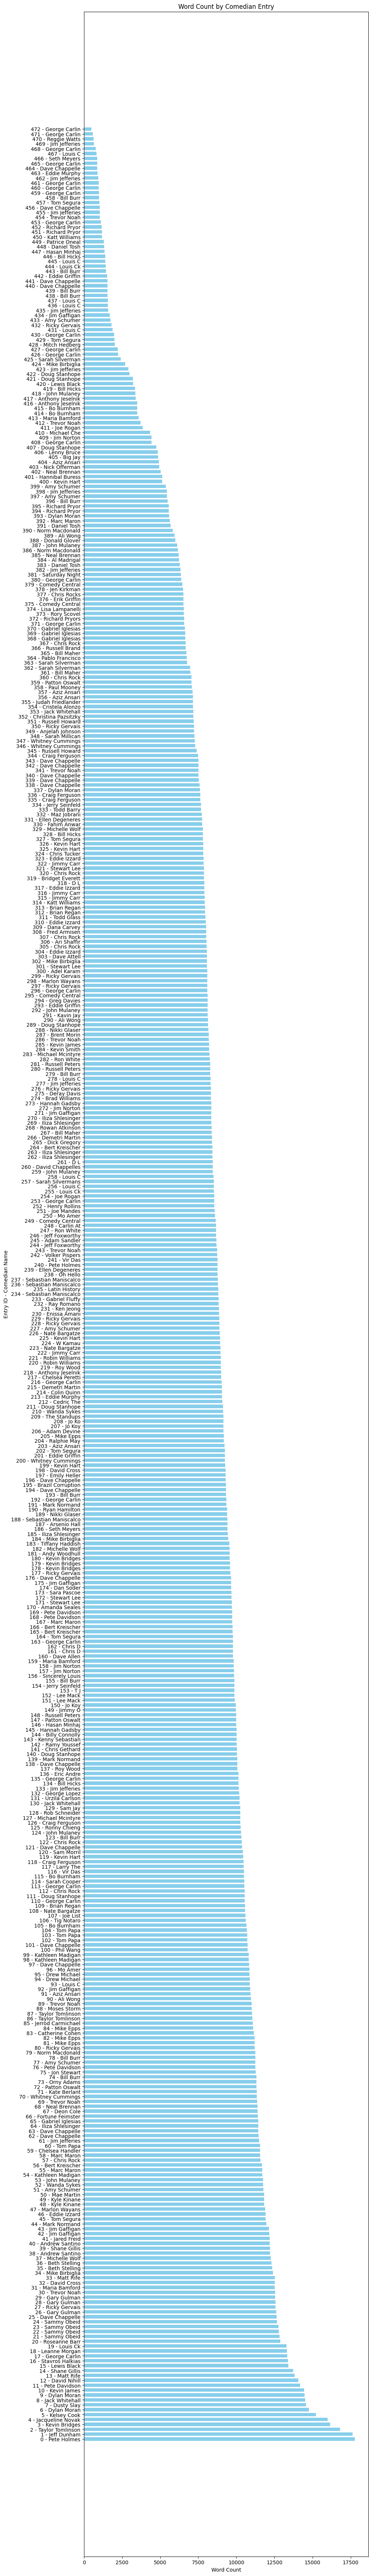

In [111]:
import matplotlib.pyplot as plt 

sorted_df = df.sort_values('word_count', ascending=False)

plt.figure(figsize=(10, 90))
plt.barh(df['Unique ID'].astype(str) + ' - ' + df['Comedian Name'], sorted_df['word_count'], color='skyblue', height=0.7)
plt.xlabel('Word Count')
plt.ylabel('Entry ID - Comedian Name')
plt.title('Word Count by Comedian Entry')
plt.show()

In [98]:
duplicate_comedians = df[df['Comedian Name'].duplicated(keep=False)]

In [99]:
duplicate_comedians

,URL,transcript,Comedian Name,word_count
0,https://scrapsfromtheloft.com/comedy/pete-holm...,\n \n [audience cheering and applauding] \n He...,Pete Holmes,10068
2,https://scrapsfromtheloft.com/comedy/taylor-to...,\n \n In her 2024 Netflix stand-up comedy spec...,Taylor Tomlinson,11197
3,https://scrapsfromtheloft.com/comedy/kevin-bri...,\n \n Kevin Bridges: The Overdue Catch-Up (20...,Kevin Bridges,12777
6,https://scrapsfromtheloft.com/comedy/dylan-mor...,"\n \n In “Yeah, Yeah,” Dylan Moran offers a ...",Dylan Moran,11814
8,https://scrapsfromtheloft.com/comedy/jack-whit...,\n \n Jack Whitehall: Settle Down (2024) \n In...,Jack Whitehall,11442
...,...,...,...,...
467,https://scrapsfromtheloft.com/comedy/louis-c-k...,\n \n Louis C.K Netflix special filmed in Wash...,Louis C,8818
468,https://scrapsfromtheloft.com/comedy/george-ca...,\n \n Jammin’ in New York is George Carlin’s 1...,George Carlin,8298
469,https://scrapsfromtheloft.com/comedy/jim-jeffe...,\n \n Australian comedian Jim Jefferies breaks...,Jim Jefferies,2400
471,https://scrapsfromtheloft.com/comedy/george-ca...,\n \n Complaints and Grievances is a HBO stan...,George Carlin,8173


In [100]:
duplicate_names = df['Comedian Name'].value_counts()[df['Comedian Name'].value_counts() > 1].index.tolist()

In [101]:
duplicate_names

['George Carlin',
 'Dave Chappelle',
 'Bill Burr',
 'Jim Jefferies',
 'Ricky Gervais',
 'Louis C',
 'Trevor Noah',
 'Chris Rock',
 'Doug Stanhope',
 'Kevin Hart',
 'Tom Segura',
 'John Mulaney',
 'Iliza Shlesinger',
 'Amy Schumer',
 'Jim Gaffigan',
 'Craig Ferguson',
 'Aziz Ansari',
 'Eddie Izzard',
 'Sebastian Maniscalco',
 'Tom Papa',
 'Marc Maron',
 'Bert Kreischer',
 'Bill Hicks',
 'Gabriel Iglesias',
 'Whitney Cummings',
 'Mike Epps',
 'Richard Pryor',
 'Bo Burnham',
 'Kevin Bridges',
 'Sammy Obeid',
 'Comedy Central',
 'Stewart Lee',
 'Dylan Moran',
 'Jimmy Carr',
 'Pete Davidson',
 'Jim Norton',
 'Mike Birbiglia',
 'Daniel Tosh',
 'Anthony Jeselnik',
 'Norm Macdonald',
 'Jack Whitehall',
 'Michelle Wolf',
 'Russell Peters',
 'Bill Maher',
 'Eddie Griffin',
 'Neal Brennan',
 'Kathleen Madigan',
 'Brian Regan',
 'Louis Ck',
 'Nate Bargatze',
 'Ali Wong',
 'Taylor Tomlinson',
 'Gary Gulman',
 'Mark Normand',
 'Maria Bamford',
 'Sarah Silverman',
 'Patton Oswalt',
 'Roy Wood',
 'Vir